In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
yfinance = pd.read_csv("data/disney_yfinance.csv")
dis_submissions = pd.read_csv("data/disney_all_sub.csv")
dis_comments_500 = pd.read_csv("data/disney_500_comments_w_dates.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,4,5,6,8,9,10,11,12,16,18,19,20,21,22,24,25,26,27,28,29,30,31,35,37,39,43,44,49,53,56,58,59,60,65,66,67,68,69,74,75,76,77,78,79,80,81,83,85,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
yfinance.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,28.855125,29.533344,28.361876,29.471687,23.115255,8402230
1,1/4/2000,29.594999,31.444689,29.594999,31.198063,24.469284,16051191
2,1/5/2000,31.198063,32.677814,31.198063,32.492844,25.484806,19823822
3,1/6/2000,32.492844,32.677814,31.198063,31.198063,24.469284,7903193
4,1/7/2000,31.198063,31.691313,30.396530,30.704813,24.082420,6773543


In [4]:
dis_submissions.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,brand_safe,rte_mode,author_id,previous_visits,suggested_sort,author_created_utc,approved_at_utc,banned_at_utc,view_count,creation_date
0,[],False,The-Remix-God-ALT,0,[],0,text,t2_8b0yo2pg,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
1,[],False,Supershlee777,0,[],0,text,t2_7zle95u7,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
2,[],False,theagileartist,0,[],0,text,t2_7ohoma2p,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
3,[],False,PeachyLeee,0,[],0,text,t2_684v8y3b,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021
4,[],False,artsychimichanga,0,[],0,text,t2_50qxngv9,False,False,...,0,0,0,0,0,0.0,0,0,0,01-10-2021


In [5]:
dis_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium',
       ...
       'brand_safe', 'rte_mode', 'author_id', 'previous_visits',
       'suggested_sort', 'author_created_utc', 'approved_at_utc',
       'banned_at_utc', 'view_count', 'creation_date'],
      dtype='object', length=101)

In [6]:
drop_columns = [
    'all_awardings', 'author_flair_css_class', 'author_flair_richtext', 'author_patreon_flair', 'author_premium',
    'can_mod_post', 'contest_mode', 'gildings', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 
    'is_robot_indexable', 'link_flair_background_color', 'link_flair_text_color', 'locked', 'media_only', 'no_follow',
    'parent_whitelist_status', 'permalink', 'pwls', 'removed_by_category', 'send_replies', 'spoiler',
    'url', 'whitelist_status', 'wls', 'link_flair_css_class', 'link_flair_template_id', 'post_hint', 'preview',
    'thumbnail_height', 'thumbnail_width', 'url_overridden_by_dest', 'author_flair_background_color', 'author_flair_template_id',
    'author_flair_text_color', 'is_gallery', 'edited', 'banned_by', 'author_is_blocked', 'author_flair_text', 'author_flair_type',
    'secure_media', 'secure_media_embed', 'author_cakeday'
]

for _ in drop_columns:
    del dis_submissions[_]
        
dis_submissions.columns

Index(['allow_live_comments', 'author', 'author_fullname', 'awarders',
       'created_utc', 'domain', 'full_link', 'id', 'is_self', 'is_video',
       'link_flair_richtext', 'link_flair_type', 'num_comments',
       'num_crossposts', 'over_18', 'pinned', 'retrieved_on', 'score',
       'selftext', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'treatment_tags', 'upvote_ratio',
       'link_flair_text', 'media', 'media_embed', 'distinguished',
       'is_created_from_ads_ui', 'gallery_data', 'media_metadata',
       'crosspost_parent', 'crosspost_parent_list', 'gilded',
       'steward_reports', 'updated_utc', 'collections', 'og_description',
       'og_title', 'removed_by', 'brand_safe', 'rte_mode', 'author_id',
       'previous_visits', 'suggested_sort', 'author_created_utc',
       'approved_at_utc', 'banned_at_utc', 'view_count', 'creation_date'],
      dtype='object')

In [7]:
dis_submissions['created_utc']

0        1610296640
1        1610295828
2        1610294416
3        1610293394
4        1610292454
            ...    
80255    1417798928
80256    1417798765
80257    1417795991
80258    1417790770
80259    1417789646
Name: created_utc, Length: 80260, dtype: int64

In [8]:
from datetime import datetime

sub_dates = []

for _ in dis_submissions['created_utc']:
    fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
    sub_dates.append(fts)

# Appends new column to dataframe, contains readable string date-times
dis_submissions['creation_date'] = sub_dates

In [9]:
dis_submissions['creation_date']

0        01-10-2021
1        01-10-2021
2        01-10-2021
3        01-10-2021
4        01-10-2021
            ...    
80255    12-05-2014
80256    12-05-2014
80257    12-05-2014
80258    12-05-2014
80259    12-05-2014
Name: creation_date, Length: 80260, dtype: object

## Function to append a readable creation date column to subreddit df

In [10]:
def create_date_reddit(reddit_df):
    sub_dates = []

    for _ in reddit_df['created_utc']:
        fts = datetime.utcfromtimestamp(_).strftime('%m-%d-%Y')
        sub_dates.append(fts)

    # Appends new column to dataframe, contains readable string date-times
    reddit_df['creation_date'] = sub_dates

In [11]:
dis_begin = dis_submissions['creation_date'].iloc[-1]
dis_begin

'12-05-2014'

In [12]:
dis_datetime_object = datetime.strptime(dis_begin, '%m-%d-%Y')
dis_datetime_object

datetime.datetime(2014, 12, 5, 0, 0)

In [13]:
y_begin = yfinance['Date'][0]

In [14]:
y_datetime_object = datetime.strptime(y_begin, '%m/%d/%Y')
y_datetime_object

datetime.datetime(2000, 1, 3, 0, 0)

In [15]:
yfinance['Date'][0].replace('/', '-')

'1-3-2000'

In [16]:
i = 0

for _ in yfinance['Date']:
    y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
    if y_datetime_object == dis_datetime_object:
        print(y_datetime_object)
        print(i)
    i += 1

2014-12-05 00:00:00
3755


In [17]:
yfinance['Date'][3755]

'12/5/2014'

## Function to Created parsed dates columns for yfinance dfs

In [18]:
parsed_dates = []

def yfi_parsed_dates(df):
    for _ in df['Date']:
        y_datetime_object = datetime.strptime(_, '%m/%d/%Y')
        parsed_dates.append(y_datetime_object)
    df['parsed_dates'] = parsed_dates

In [19]:
yfi_parsed_dates(yfinance)

In [20]:
yfinance['parsed_dates'][0]

Timestamp('2000-01-03 00:00:00')

## Function to Created parsed dates columns for subreddit dfs

In [21]:
parsed_dates = []

def red_parsed_dates(df):
    for _ in df['creation_date']:
        red_datetime_object = datetime.strptime(_, '%m-%d-%Y')
        parsed_dates.append(red_datetime_object)
    df['parsed_dates'] = parsed_dates

In [22]:
red_parsed_dates(dis_submissions)

In [23]:
dis_submissions['parsed_dates'][0]

Timestamp('2021-01-10 00:00:00')

## Function to only use yfinance dates in range of subreddit post dates and vice-versa

In [24]:
dis_submissions['parsed_dates'].sort_values()

80259   2014-12-05
80258   2014-12-05
80248   2014-12-05
80250   2014-12-05
80251   2014-12-05
           ...    
904     2021-12-04
903     2021-12-04
902     2021-12-04
901     2021-12-04
900     2021-12-04
Name: parsed_dates, Length: 80260, dtype: datetime64[ns]

In [25]:
yfinance['parsed_dates']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5488   2021-10-25
5489   2021-10-26
5490   2021-10-27
5491   2021-10-28
5492   2021-10-29
Name: parsed_dates, Length: 5493, dtype: datetime64[ns]

In [26]:
i = 0
k = 0

reddit_begin = dis_submissions['parsed_dates'].iloc[-1]
yahoo_end = yfinance['parsed_dates'].iloc[-1]

dis_submissions = dis_submissions[(dis_submissions['parsed_dates'] <= yahoo_end)]

In [27]:
yfinance = yfinance[(yfinance['parsed_dates'] >= reddit_begin)]

In [28]:
dis_submissions['parsed_dates'].sort_values()

80259   2014-12-05
80248   2014-12-05
80249   2014-12-05
80250   2014-12-05
80251   2014-12-05
           ...    
813     2021-10-29
812     2021-10-29
811     2021-10-29
821     2021-10-29
800     2021-10-29
Name: parsed_dates, Length: 78872, dtype: datetime64[ns]

In [29]:
yfinance['parsed_dates']

3755   2014-12-05
3756   2014-12-08
3757   2014-12-09
3758   2014-12-10
3759   2014-12-11
          ...    
5488   2021-10-25
5489   2021-10-26
5490   2021-10-27
5491   2021-10-28
5492   2021-10-29
Name: parsed_dates, Length: 1738, dtype: datetime64[ns]

## Group together desired values with same dates in subreddit df

In [30]:
reddit_sub_scores = dis_submissions[['score', 'parsed_dates']]
reddit_sub_scores.head

<bound method NDFrame.head of        score parsed_dates
0          1   2021-01-10
1          1   2021-01-10
2          1   2021-01-10
3          1   2021-01-10
4          1   2021-01-10
...      ...          ...
80255      1   2014-12-05
80256      3   2014-12-05
80257     13   2014-12-05
80258     11   2014-12-05
80259    133   2014-12-05

[78872 rows x 2 columns]>

In [31]:
scores_date_grouped = reddit_sub_scores.groupby(reddit_sub_scores['parsed_dates'].dt.date, as_index=True).sum()

In [32]:
scores_date_grouped['parsed_dates'] = scores_date_grouped.index
scores_date_grouped_df = scores_date_grouped.set_index(np.arange(len(scores_date_grouped)))

In [33]:
scores_date_grouped_df.head(12)

,score,parsed_dates
0,300,2014-12-05
1,448,2014-12-06
2,135,2014-12-07
3,577,2014-12-08
4,768,2014-12-09
5,1105,2014-12-10
6,392,2014-12-11
7,162,2014-12-12
8,835,2014-12-13
9,583,2014-12-14


In [34]:
i = 0
for _ in np.arange(len(scores_date_grouped_df)):
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
        i += 1
i

1789

In [35]:
i_arr = []
for _ in np.arange(len(scores_date_grouped_df)):
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5 or scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
        i_arr.append(scores_date_grouped_df.iloc[_]['parsed_dates'])
    
len(i_arr)

714

In [36]:
weekends = 0
i = 0
k = 0
weekend_sum = []
weekender = []


for _ in np.arange(len(scores_date_grouped_df)):

    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
        weekends += scores_date_grouped_df.iloc[_]['score']
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
        weekends += scores_date_grouped_df.iloc[_]['score']
        weekender.append(weekends)

    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
        monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]

        scores_date_grouped_df.iloc[_]['score'] = monday
        i += 1

        weekends = 0
        
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
        weekend_sum.append(scores_date_grouped_df.iloc[_]['score'])

D:\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [37]:
weekend_sum

[300,
 577,
 768,
 1105,
 392,
 162,
 894,
 856,
 613,
 1095,
 327,
 767,
 1150,
 931,
 469,
 1838,
 200,
 467,
 942,
 326,
 553,
 312,
 803,
 605,
 616,
 1950,
 1305,
 364,
 485,
 766,
 336,
 794,
 887,
 548,
 931,
 1125,
 1327,
 433,
 306,
 234,
 133,
 654,
 935,
 215,
 1471,
 966,
 143,
 706,
 704,
 1831,
 883,
 566,
 524,
 853,
 1222,
 711,
 777,
 878,
 1535,
 249,
 502,
 524,
 652,
 467,
 1103,
 1667,
 584,
 1058,
 965,
 455,
 58,
 918,
 494,
 455,
 232,
 1256,
 388,
 358,
 722,
 1255,
 1363,
 591,
 853,
 148,
 97,
 1469,
 558,
 110,
 646,
 290,
 1064,
 218,
 117,
 723,
 278,
 356,
 1430,
 530,
 733,
 692,
 321,
 1691,
 631,
 250,
 276,
 335,
 1477,
 775,
 50,
 907,
 659,
 727,
 998,
 220,
 377,
 166,
 705,
 741,
 594,
 649,
 402,
 616,
 626,
 1174,
 49,
 172,
 299,
 446,
 1031,
 238,
 1169,
 718,
 1051,
 525,
 247,
 356,
 777,
 1332,
 367,
 575,
 1050,
 100,
 782,
 268,
 1257,
 683,
 758,
 888,
 964,
 318,
 394,
 809,
 637,
 793,
 554,
 547,
 86,
 1110,
 524,
 206,
 778,
 122,
 6

In [38]:
len(weekend_sum)

1789

In [39]:
weekends = 0
i = 0
k = 0
# weekend_sum = []
weekend_dict = {}
weekender = []

for _ in np.arange(len(scores_date_grouped_df)):
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
        weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = 0


for _ in np.arange(len(scores_date_grouped_df)):

    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 5:
        weekends += scores_date_grouped_df.iloc[_]['score']
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 6:
        weekends += scores_date_grouped_df.iloc[_]['score']
        weekender.append(weekends)

    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() == 0:
        monday = scores_date_grouped_df.iloc[_]['score'] + weekender[i]

        scores_date_grouped_df.iloc[_]['score'] = monday
        i += 1

        weekends = 0
        
    if scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() !=  5 and scores_date_grouped_df.iloc[_]['parsed_dates'].weekday() != 6:
        # weekend_sum[scores_date_grouped_df.iloc[_]['parsed_dates']].append(scores_date_grouped_df.iloc[_]['score'])
        weekend_dict[scores_date_grouped_df.iloc[_]['parsed_dates']] = (scores_date_grouped_df.iloc[_]['score'])

In [40]:
weekend_dict

{datetime.date(2014, 12, 5): 300,
 datetime.date(2014, 12, 8): 577,
 datetime.date(2014, 12, 9): 768,
 datetime.date(2014, 12, 10): 1105,
 datetime.date(2014, 12, 11): 392,
 datetime.date(2014, 12, 12): 162,
 datetime.date(2014, 12, 15): 894,
 datetime.date(2014, 12, 16): 856,
 datetime.date(2014, 12, 17): 613,
 datetime.date(2014, 12, 18): 1095,
 datetime.date(2014, 12, 19): 327,
 datetime.date(2014, 12, 22): 767,
 datetime.date(2014, 12, 23): 1150,
 datetime.date(2014, 12, 24): 931,
 datetime.date(2014, 12, 25): 469,
 datetime.date(2014, 12, 26): 1838,
 datetime.date(2014, 12, 29): 200,
 datetime.date(2014, 12, 30): 467,
 datetime.date(2014, 12, 31): 942,
 datetime.date(2015, 1, 1): 326,
 datetime.date(2015, 1, 2): 553,
 datetime.date(2015, 1, 5): 312,
 datetime.date(2015, 1, 6): 803,
 datetime.date(2015, 1, 7): 605,
 datetime.date(2015, 1, 8): 616,
 datetime.date(2015, 1, 9): 1950,
 datetime.date(2015, 1, 12): 1305,
 datetime.date(2015, 1, 13): 364,
 datetime.date(2015, 1, 14): 485,

In [58]:
del weekday_df

In [59]:
weekday_df = pd.DataFrame(np.arange(len(weekend_dict)))
weekday_df['date'] = weekend_dict.keys()
weekday_df['score'] = weekend_dict.values()
weekday_df = weekday_df.drop(columns=0)

In [60]:
weekday_df

,date,score
0,2014-12-05,300
1,2014-12-08,577
2,2014-12-09,768
3,2014-12-10,1105
4,2014-12-11,392
...,...,...
1784,2021-10-25,51
1785,2021-10-26,40
1786,2021-10-27,56
1787,2021-10-28,45


### Ticker plot of Dis prices from 1/1/2000 to present 11/1/2021

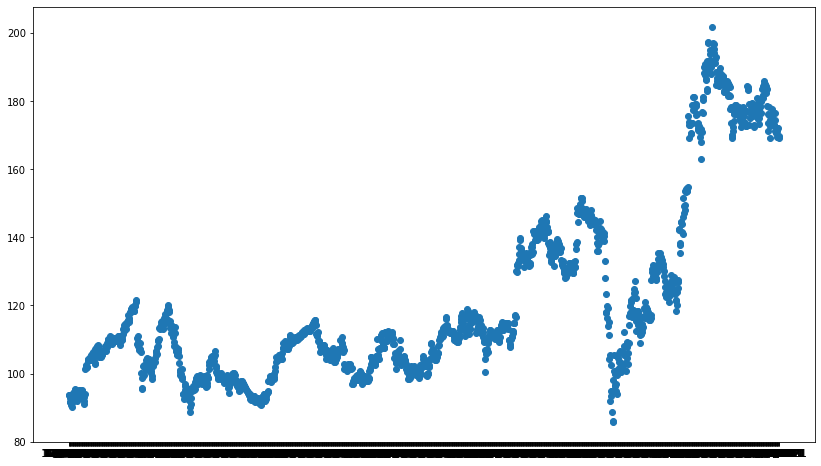

In [46]:
plt.figure(figsize=(14,8))

plt.scatter(yfinance['Date'], yfinance['Close'])

In [47]:
len(yfinance['Date'])

1738

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

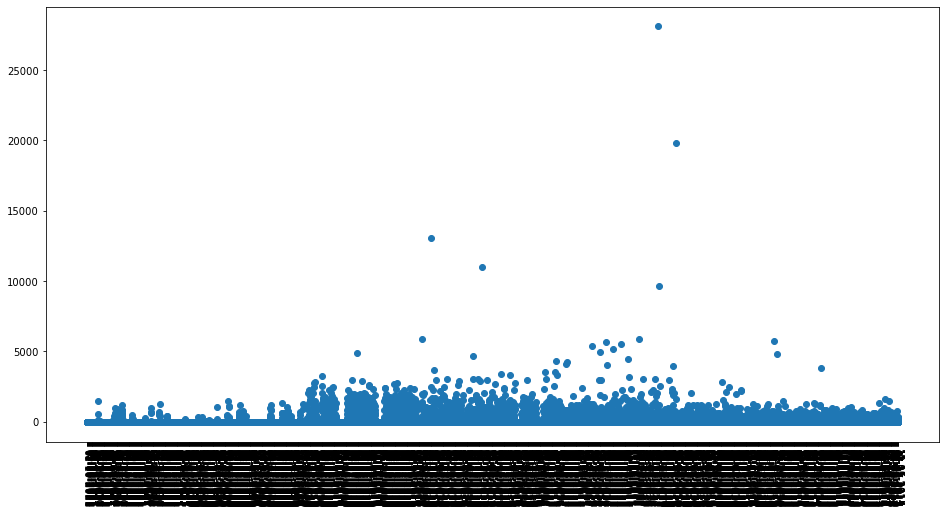

In [48]:
plt.figure(figsize=(16,8))

plt.scatter(dis_submissions['creation_date'], dis_submissions['score'])
plt.xticks(rotation=270)

In [51]:
score_dict = {}

len(dis_submissions['creation_date'].unique())

2503

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

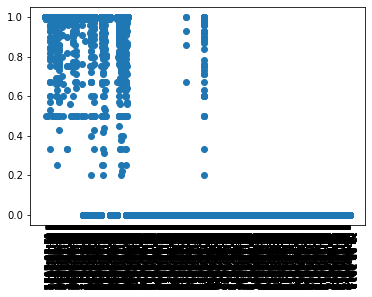

In [53]:
plt.scatter(dis_submissions['creation_date'], dis_submissions['upvote_ratio'])
plt.xticks(rotation=270)

In [ ]:
plt.scatter(dis_submissions['creation_date'], dis_submissions['total_awards_received'])
plt.xticks(rotation=270)

In [61]:
X = weekday_df['score']
y = yfinance['Close']

In [62]:
len(X)

1789

In [63]:
len(y)

1738

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f'X_train size: {X_train.shape}')
# print(f'y_train size: {y_train.shape}')
# print(f'X_test size: {X_test.shape}')
# print(f'y_test size: {y_test.shape}')

In [ ]:
from sklearn.linear_model import LinearRegression

